<a href="https://colab.research.google.com/github/kap2fox/Intro-to-Robotics/blob/main/eng_DC_motor_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DC motor modeling
Here is equation for a DC motor modeling with the basic fundamental laws of physics, as Faraday's Law of Electromagnetic Induction, Ampère's Law, Newton's Second Law, Kirchhoff's Voltage Law: $$\dot\omega+\frac{k_m k_e}{JR}\omega=\frac{k_m}{JR}U. \tag{1}$$ This differential equation, given known initial conditions, has a unique solution. Let us attempt to solve it using Python tools. However, before proceeding, it is worth simplifying the calculations and reducing the expression by substituting constants. We introduce the electromechanical constant: $$T_m=\frac{JR}{k_e k_m}.\tag{2}$$ Next, we will input all necessary parameters into the environment.

In [ ]:
import sympy                                  # simbolic computations sympy
U, T_m, t = sympy.symbols("U,T_m,t")       # symbols of voltage, time constant and current time
k_e = sympy.symbols("k_e",positive=True)      # constructive constant, must be positive for a unique solution of the differential equation
omega = sympy.Function("omega")               # angular velocity function

We have imported the SymPy library for symbolic computations and described all the variables used in equation (1) after substituting the constant replacement (2). Now, we can describe the differential equation by specifying the dependence of speed on time: $$\dot\omega(t)=\frac{d}{dt}\omega=\frac{U}{T_m k_e}-\frac{\omega(t)}{T_m}. \tag{3}$$

In [ ]:
ode = sympy.Eq( omega(t).diff(t), U/(k_e*T_m) - omega(t)/T_m)   # description of the differential equation of a DC motor
ode

Eq(Derivative(omega(t), t), U/(T_m*k_e) - omega(t)/T_m)

At the initial moment in time, the engine is not rotating, and the rotation angle is zero. The initial condition for the engine at time $t=0\ [sec]$ will be an angular velocity of $\omega=0\ [rad/sec]$.

In [ ]:
ode_sol = sympy.dsolve(ode, omega(t), ics={omega(0):0})         # ODE solution with zero initial conditions
ode_sol

Eq(omega(t), U/k_e - U*exp(-t/T_m)/k_e)

Revealing a fractional value.

In [ ]:
ode_sol = sympy.expand(ode_sol)                                 # simplification of the solution result
ode_sol

Eq(omega(t), U/k_e - U*exp(-t/T_m)/k_e)

Equation for the angular velocity of a DC motor is completed. We substitute the approximate constants of the DC motor to plot it, $T_m=0.08 [sec]$, $\ k_e=0.5 [V*sec/rad]$, $\ U=8 [V]$.

In [ ]:
ode_num = ode_sol.subs({k_e : 0.5, T_m : 0.08, U : 8})          # substitution of numerical values ​​into the equation
ode_num

Eq(omega(t), 16.0 - 16.0*exp(-12.5*t))

Displaying the engine acceleration curve.

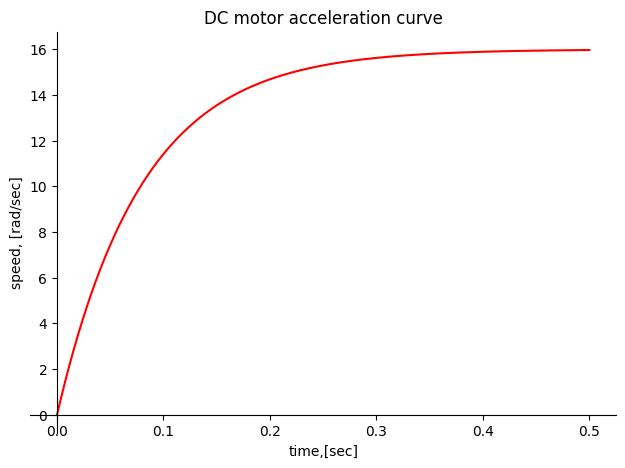

In [ ]:
from sympy.plotting import plot                                 # plot for sympy
plot(ode_num.rhs,(t, 0, 0.5), line_color='red',
     title='DC motor acceleration curve',xlabel = 'time,[sec]',
     ylabel = 'speed, [rad/sec]')                               # ODE solution plot at time [0; 0.5]

the DC motor has a rotation angle sensor, an optical encoder, for example. Therefore, to work with the motor model, we need the rotation angle, not the angular velocity. You can get it by taking the integral of the angular velocity over time in the interval from 0 to the current time t.

In [ ]:
theta_eq = sympy.integrate(ode_sol.rhs,(t,0,t))                 # integration of the right side of the angular velocity equation
theta_eq

-T_m*U/k_e + T_m*U*exp(-t/T_m)/k_e + U*t/k_e

Also, the equation of the rotation angle can be obtained by solving the differential equation for the rotation angle $\omega=\dot\theta$, that is,$$\ddot\theta=\frac{U}{T_m k_e}-\frac{\dot\theta}{T_m}.  \tag{4}$$ In this case, the initial conditions are the same, at the time $t = 0[sec]$ the engine rotation angle is $\theta = 0[rad]$ and the angular velocity $\dot\theta = 0[rad]$. Next, we will check the integration result at the previous step for the initial condition $\dot\theta(0)=0$:

In [ ]:
theta = sympy.Function("theta")                                                 # creation of the rotation angle function
ode_theta = sympy.Eq( theta(t).diff(t,2), - theta(t).diff(t)/T_m + U/(k_e*T_m)) # ODE description
ode_sol_theta = sympy.dsolve(ode_theta, theta(t),
                             ics={theta(0):0, theta(t).diff(t).subs(t,0): 0})   # ODE solution
ode_sol_theta

Eq(theta(t), -T_m*U/k_e + T_m*U*exp(-t/T_m)/k_e + U*t/k_e)

The last step is ploting of the rotation angle function.

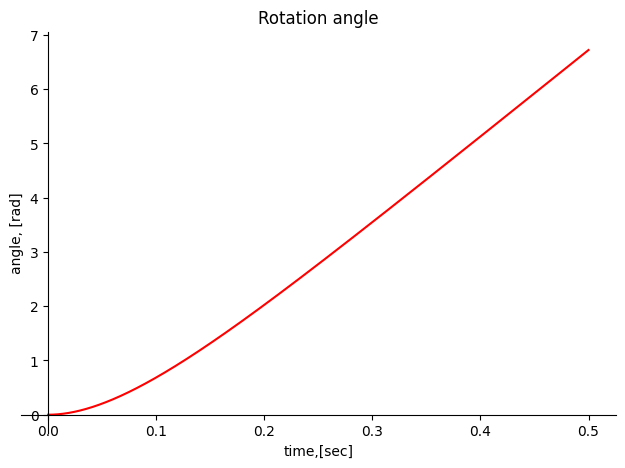

In [ ]:
theta_num = ode_sol_theta.subs({k_e : 0.5, T_m : 0.08, U : 8})                  # numerical values substitutin
plot(theta_num.rhs,(t, 0, 0.5), line_color='red',
     title='Rotation angle',
     xlabel = 'time,[sec]', ylabel = 'angle, [rad]')                            # plot function at time [0; 0.5]